<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/Visualizaci%C3%B3n_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo desafío | Data Science

Escoger uno de los 3 dataset de la **clase 5**
Para el anterior desafío presente 3 dataset:
1.   Perth House Price
2.   Credit Card Fraud Detection
3.   Hotel Reservations Dataset

En esta oportunidad usaré el primer dataset: Perth House Price

# Preparación de los datos

**Perth | Australia**
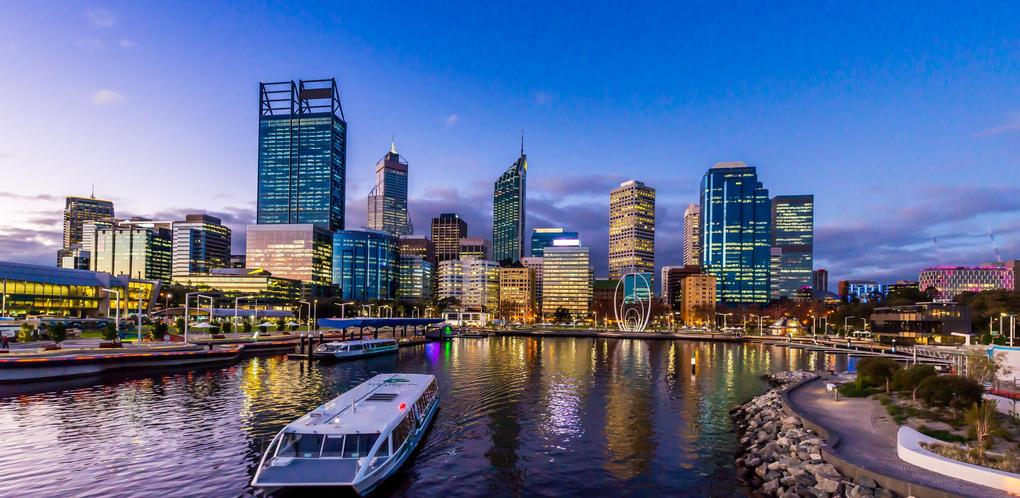

In [1]:
# Codigo para trabajar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
PATH = "/content/drive/MyDrive/Primera Entrega (Data Science)/Bases de datos/Perth Data.csv"
df = pd.read_csv(PATH)

In [ ]:
df.shape

(33656, 19)

In [ ]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [ ]:
list(df.columns)

['ADDRESS',
 'SUBURB',
 'PRICE',
 'BEDROOMS',
 'BATHROOMS',
 'GARAGE',
 'LAND_AREA',
 'FLOOR_AREA',
 'BUILD_YEAR',
 'CBD_DIST',
 'NEAREST_STN',
 'NEAREST_STN_DIST',
 'DATE_SOLD',
 'POSTCODE',
 'LATITUDE',
 'LONGITUDE',
 'NEAREST_SCH',
 'NEAREST_SCH_DIST',
 'NEAREST_SCH_RANK']

In [4]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['address', 'suburb', 'price', 'bedrooms', 'bathrooms', 'garage',
       'land_area', 'floor_area', 'build_year', 'cbd_dist', 'nearest_stn',
       'nearest_stn_dist', 'date_sold', 'postcode', 'latitude', 'longitude',
       'nearest_sch', 'nearest_sch_dist', 'nearest_sch_rank'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           33656 non-null  object 
 1   suburb            33656 non-null  object 
 2   price             33656 non-null  int64  
 3   bedrooms          33656 non-null  int64  
 4   bathrooms         33656 non-null  int64  
 5   garage            31178 non-null  float64
 6   land_area         33656 non-null  int64  
 7   floor_area        33656 non-null  int64  
 8   build_year        30501 non-null  float64
 9   cbd_dist          33656 non-null  int64  
 10  nearest_stn       33656 non-null  object 
 11  nearest_stn_dist  33656 non-null  int64  
 12  date_sold         33656 non-null  object 
 13  postcode          33656 non-null  int64  
 14  latitude          33656 non-null  float64
 15  longitude         33656 non-null  float64
 16  nearest_sch       33656 non-null  object

In [ ]:
df.describe()

,price,bedrooms,bathrooms,garage,land_area,floor_area,build_year,cbd_dist,nearest_stn_dist,postcode,latitude,longitude,nearest_sch_dist,nearest_sch_rank
count,3.365600e+04,33656.000000,33656.000000,31178.000000,33656.000000,33656.000000,30501.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,33656.000000,22704.000000
mean,6.370720e+05,3.659110,1.823063,2.199917,2740.644016,183.501545,1989.706436,19777.374465,4523.371494,6089.420074,-31.960664,115.879265,1.815268,72.672569
std,3.558256e+05,0.752038,0.587427,1.365225,16693.513215,72.102982,20.964330,11364.415413,4495.064024,62.167921,0.177780,0.118137,1.746000,40.639795
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,503.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068437,115.789763,0.880568,39.000000
50%,5.355000e+05,4.000000,2.000000,2.000000,682.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933231,115.854198,1.345520,68.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,838.000000,222.250000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843818,115.970722,2.097225,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [ ]:
df.build_year.min()

1868.0

In [ ]:
df.build_year.max()

2017.0

# Gráficos con matplotlib

## Gráfico 1

**Histograma**


Text(0, 0.5, 'Frecuencia')

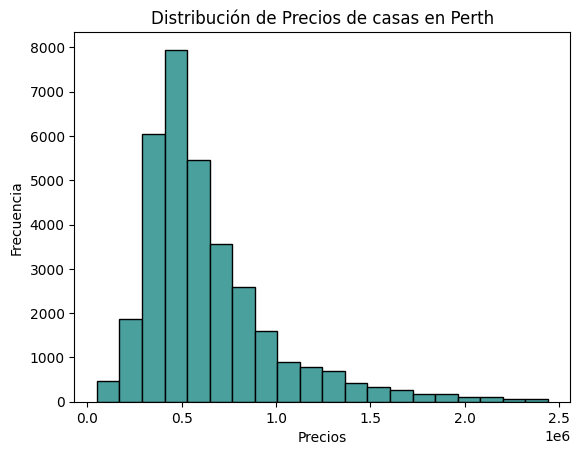

In [7]:
fig, ax = plt.subplots()

ax.hist(df["price"], bins=20, edgecolor="black", color="#49a09d")
ax.set_title("Distribución de Precios de casas en Perth")
ax.set_xlabel("Precios")
ax.set_ylabel("Frecuencia")

**Interpretación**

Este histograma nos permite ver la distribución de precios de casas en Perth. Podemos observar que se trata de un gráfico con ***asimetría positiva*** donde la media es mayor a la mediana.

En otras palabras, la distribución de precios obtenida nos dice que la mayoría de casas en Perth suelen ser de precios bajos con respecto a un menor número de casas con precios muy altos.


> Una ***asimetria positiva*** indica que existen valores atipicos en la cola derecha, esto significa que existen casas con precios demasiados altos.

## Gráfico 2

**Barplot**

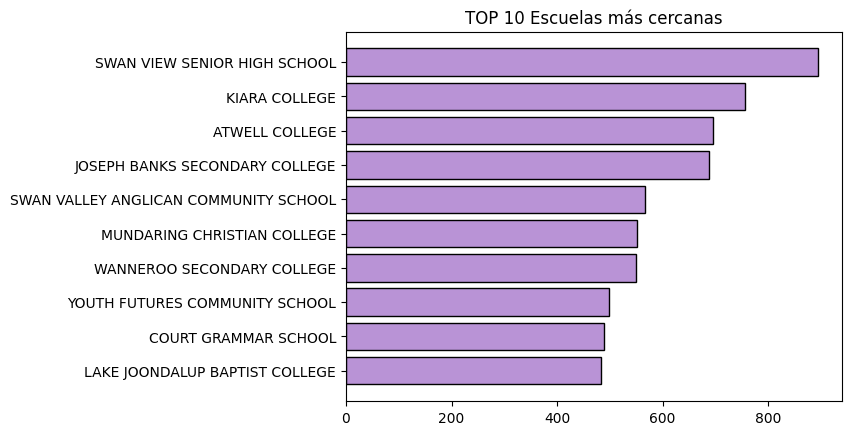

In [10]:
school_counts = df["nearest_sch"].value_counts().head(10)
school_counts = school_counts.sort_values(ascending=True)

fig, ax = plt.subplots()
ax.barh(school_counts.index,school_counts.values, color='#b993d6', edgecolor='black')
ax.set_title('TOP 10 Escuelas más cercanas')
plt.show()

**Interpretación**

Este barplot nos presenta el ranking de las 10 escuelas más cercanas donde se puede apreciar que la escuela ***SWAN VIEW SENIOR HIGH SCHOOL*** es la número 1, y esta más cerca a 800 casas.

La cercanía de una escuela puede ser un gran determinante para que muchas familias consideren mudarse a Perth, pues proprociona comodidad y facilita el acceso a la educación de sus hijos.

## Gráfico 3

**Scatter plot**

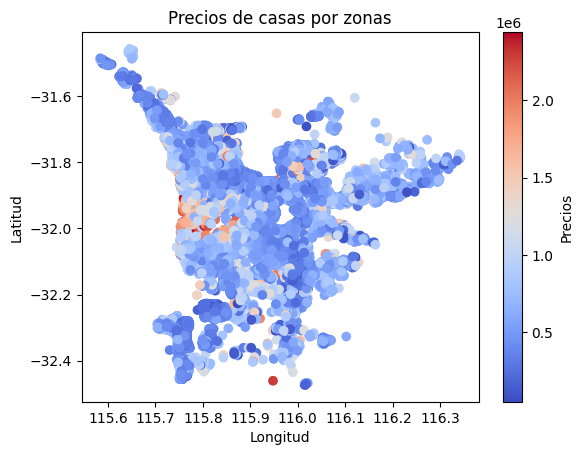

In [ ]:
fig, ax = plt.subplots()
x = df.longitude
y = df.latitude

scatter = ax.scatter(x, y, c=df.price, cmap='coolwarm')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Precios de casas por zonas')

cbar = plt.colorbar(scatter)
cbar.set_label('Precios')

plt.show()

**Interpretación**

Este scatterplot nos permite hacer un análisis geográfico de los precios de las casas con respecto a su ubicación.

En los ejes estan las coordenadas de la ciudad, y los puntos coloreados reflejan los precios. Para esto se usa una paleta de colores que nos permite diferencias la casas con precios bajos (azul) con los casas de precios altos (rojo).

Se puede observar las casas que estan en las ciudades que se encuentran en el medio de la ciudad, pero cerca al mar, son las más caras.

Mientras que las casas que estan en los extremos son las que tienen menor precio, a excepción de una casa (outlier).

# Gráficos con seaborn

## Gráfico 1

**Heatmap**

<ipython-input-6-0da735e1e8c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


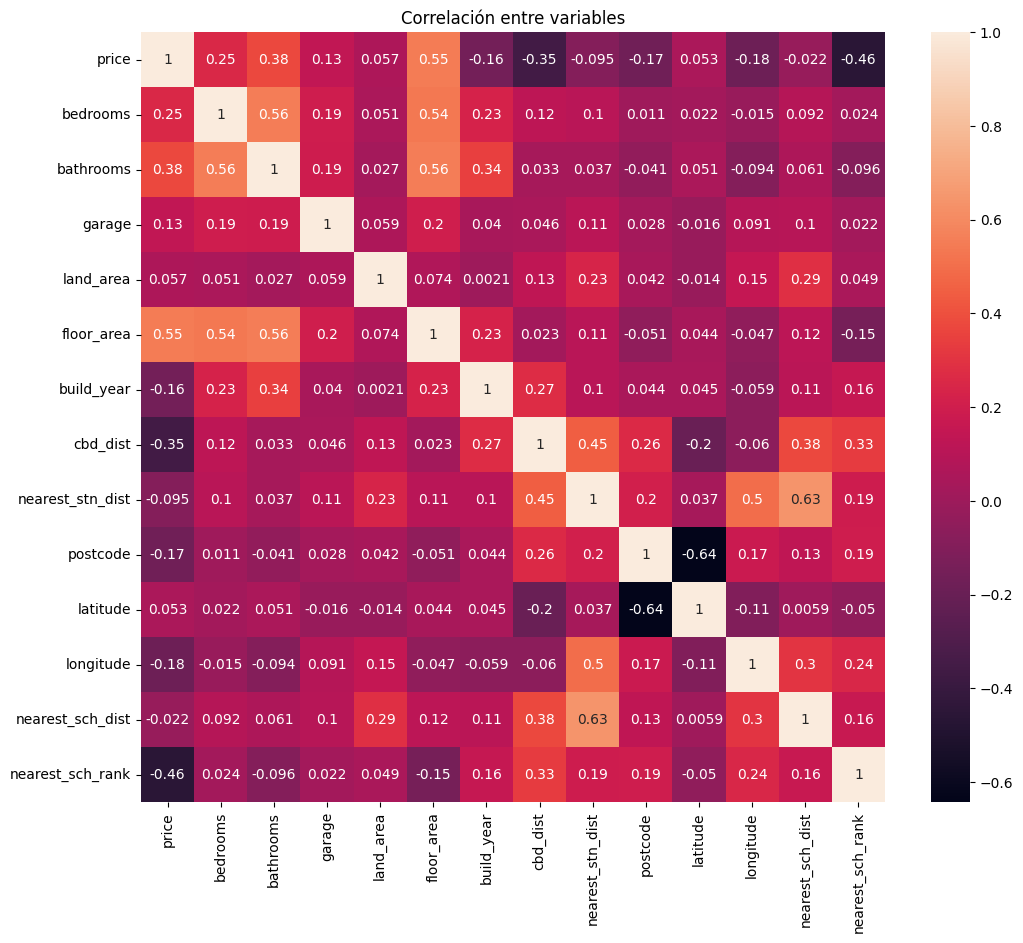

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlación entre variables")
plt.show()

**Interpretación**

Para interpretar el gráfico heatmap, es importante entender que significa la correlación.

La correlación es un indicador que nos explica la relación lineal entre variables, esto no implica causalidad. Con un gráfico de correlación se busca medir si esta es alta o baja, pues nos daría de que tan relacionadas estan las variables.

*   Correlación positiva: Si el valor es cercano a 1, indica una correlación fuerte en el mismo sentido.
*   Correlación negativa: Si el valor es cercano a -1, indica una correlación fuerte en sentido contrario.
*   Correlación cercana a 0: Esto indica una correlación débil entre variables.

Del heatmap, podemos observar que existe una correlación fuerte entre las variables **price** y **floor_area**, en otras palabras, nos dice que mientras el area de la casa de mayor el precio más alto. Lo cuál suele suceder en estos casos de venta de casas.

Otra indicador interesante que podemos apreciar del heatmap es que existe una correlación fuerte negativa entre **price** y **nearest_sch_rank**. Esto se explica claramente, pues si la escuela esta mal clasifica en el ranking la casa costará menos, porque la gente preferirá vivir cerca a las escuelas más prestigiosas.


## Gráfico 2

**Lineplot**

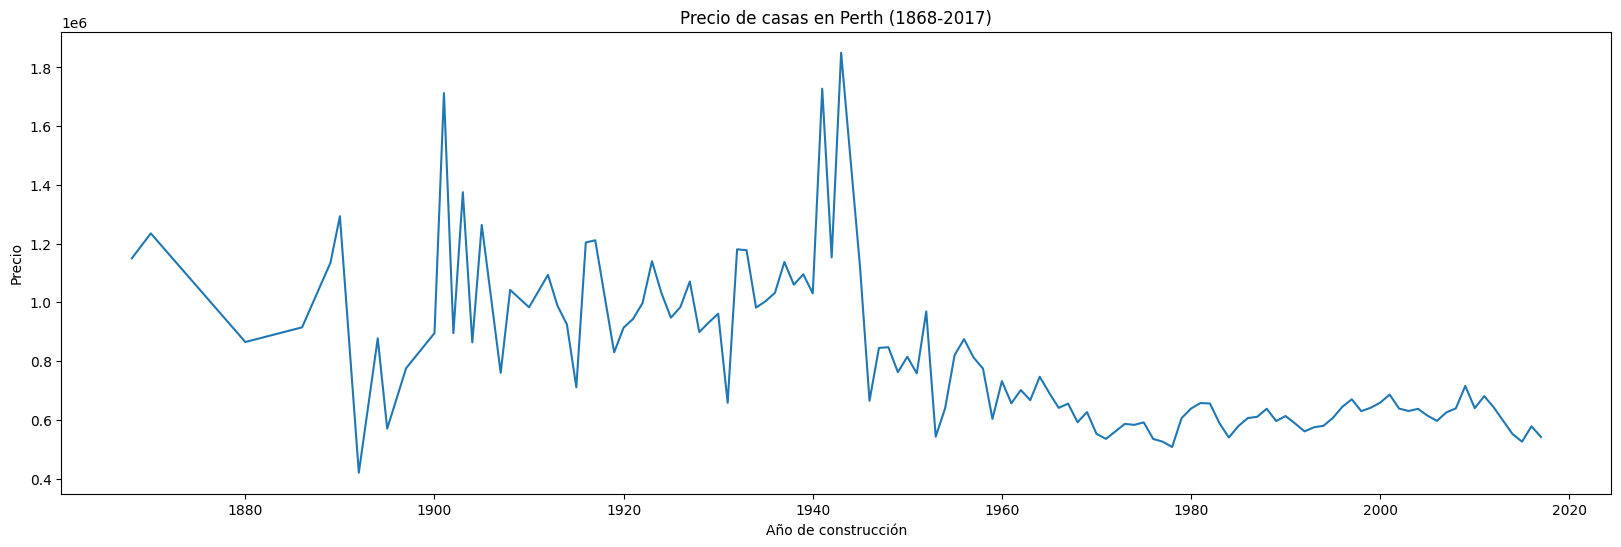

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.lineplot(x=df['build_year'], y=df['price'], errorbar=None)
plt.xlabel('Año de construcción')
plt.ylabel('Precio')
plt.title('Precio de casas en Perth (1868-2017)')

plt.show()

**Interpretación**

Este gráfico lineal muestra la variación de los precios de las casas a lo largo de los años. El pico más alto se dio en la decada de los años 40, quizas el alza de precios se dio por un acontecimiento en dicho país o tambien, pueden ser las casas que estan cerca al mar.

## Gráfico 3

**Boxplot**

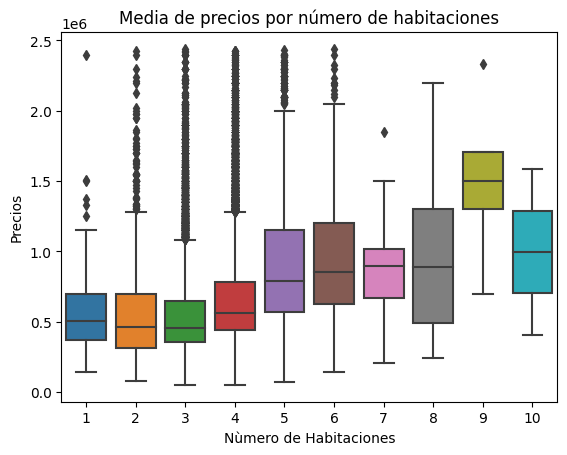

In [ ]:
sns.boxplot(data=df, x='bedrooms', y='price')

plt.title('Media de precios por número de habitaciones')
plt.xlabel('Nùmero de Habitaciones')
plt.ylabel('Precios')

plt.show()

**Interpretación**

En el gráfico de cajas y bigotes, podemos observar que:

*   Las casas con 9 habitaciones suelen tener más valor que las de 10 habitaciones.
*   Entre las casas de 1, 2 y 3 habitaciones suelen tener precios que no difieren mucho.
*   Se presentan casos atipicos, donde se pueden encontrar casas demasiadas caras a pesar de no contar con tantas habitaciones.

Estos precios quizas puedan diferir por la ubicación geográfica o la modernidad de las casas.
